In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define matplotlib defaults
plt.rcParams['figure.figsize']        = 8., 6.
plt.rcParams['axes.labelsize']        = 18
plt.rcParams['axes.titlesize']        = 18
plt.rcParams['xtick.top']             = True
plt.rcParams['xtick.bottom']          = True
plt.rcParams['ytick.left']            = True
plt.rcParams['ytick.right']           = True
plt.rcParams['xtick.direction']       = 'in'
plt.rcParams['ytick.direction']       = 'in'
plt.rcParams['xtick.labelsize']       = 14
plt.rcParams['ytick.labelsize']       = 14
plt.rcParams['xtick.major.pad']       = 6.
plt.rcParams['xtick.minor.pad']       = 6.
plt.rcParams['ytick.major.pad']       = 6.
plt.rcParams['ytick.minor.pad']       = 6.
plt.rcParams['xtick.major.size']      = 6. # major tick size in points
plt.rcParams['xtick.minor.size']      = 3. # minor tick size in points
plt.rcParams['ytick.major.size']      = 6. # major tick size in points
plt.rcParams['ytick.minor.size']      = 3. # minor tick size in points
plt.rcParams['text.usetex']           = False
plt.rcParams['font.family']           = 'serif'
plt.rcParams['font.size']             = 18

pd.set_option('display.max_columns', None)

# LSUN256

In [2]:
experiment_prefix = 'LSUN256'
# Load results
df = pd.read_csv(f'../data/{experiment_prefix.lower()}.csv')
models = df.model.unique().tolist()
print(df.shape)
df.head()

(202, 10)


,id,model,num_correct,err_rt,f_err_rt,r_err_rt,r_ans_rt,resp_time,f_resp_time,r_resp_time
0,participant_0,admnet-dropout,119.0,0.405,0.49,0.32,0.585,306.91,152.06,154.84
1,participant_1,admnet-dropout,117.0,0.415,0.35,0.48,0.435,257.88,116.78,141.10
2,participant_2,admnet-dropout,142.0,0.290,0.30,0.28,0.510,333.77,162.47,171.30
3,participant_3,admnet-dropout,110.0,0.450,0.36,0.54,0.410,214.49,103.45,111.04
4,participant_4,admnet-dropout,163.0,0.185,0.24,0.13,0.555,468.61,225.07,243.53


In [3]:
columns = df.columns.tolist()[3:]
df_results = pd.DataFrame(columns=columns)
df_results_sem = pd.DataFrame(columns=columns)
for j, model in enumerate(models):
    model_res = df.loc[df['model'] == model]
    df_results.loc[model] = model_res.mean(numeric_only=True)
    df_results_sem.loc[model] = model_res.sem(numeric_only=True) # standard error of the mean

df_results

,err_rt,f_err_rt,r_err_rt,r_ans_rt,resp_time,f_resp_time,r_resp_time
admnet-dropout,0.387000,0.440400,0.333600,0.553400,305.521600,146.537600,158.982000
ct2,0.155200,0.179200,0.131200,0.524000,325.099200,161.208800,163.888400
diffusion-projected-gan,0.148269,0.166923,0.129615,0.518654,334.649231,146.002692,188.646154
ddpm,0.267400,0.276000,0.258800,0.508600,353.783200,176.193200,177.588800
iddpm,0.297000,0.330800,0.263200,0.533800,335.946000,164.400800,171.547200
projected-gan,0.142000,0.140400,0.143600,0.498400,265.526400,126.664800,138.861200
stylegan,0.216538,0.253846,0.179231,0.537308,427.095000,202.390769,224.704231
unleashing-transformers,0.209000,0.240400,0.177600,0.531400,305.339200,152.275600,153.063200


In [4]:
df_results_sem

,err_rt,f_err_rt,r_err_rt,r_ans_rt,resp_time,f_resp_time,r_resp_time
admnet-dropout,0.019923,0.021890,0.027337,0.014707,16.642125,8.080783,9.307364
ct2,0.021648,0.027373,0.026333,0.015898,32.447377,18.178800,16.724197
diffusion-projected-gan,0.018794,0.023296,0.018485,0.009432,24.976251,9.722358,19.376277
ddpm,0.021292,0.020801,0.026162,0.010257,50.884233,29.902477,23.073641
iddpm,0.021422,0.028307,0.024561,0.015600,30.212193,16.001572,15.474743
projected-gan,0.017571,0.017306,0.021946,0.009045,20.788492,9.985223,11.809294
stylegan,0.018416,0.024533,0.017400,0.010638,70.967153,33.390340,38.150250
unleashing-transformers,0.022232,0.026873,0.024120,0.012558,31.765414,16.378699,15.623134


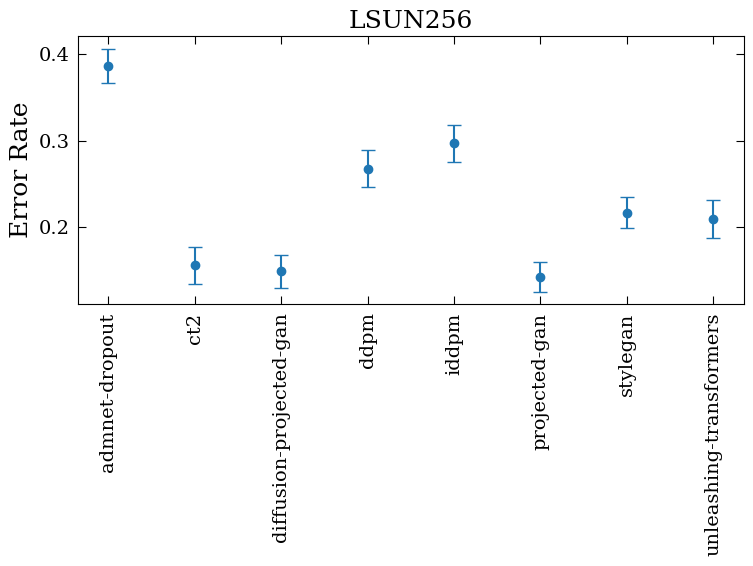

In [5]:
plt.errorbar(df_results.index, df_results.err_rt, yerr=df_results_sem.err_rt, fmt='o', capsize=5)
plt.ylabel("Error Rate")
plt.xticks(rotation=90)
plt.title(experiment_prefix.upper())
plt.tight_layout()
plt.savefig(f'../plots/{experiment_prefix}_err_rt.png', bbox_inches=None, pad_inches=0.0)

plt.show()

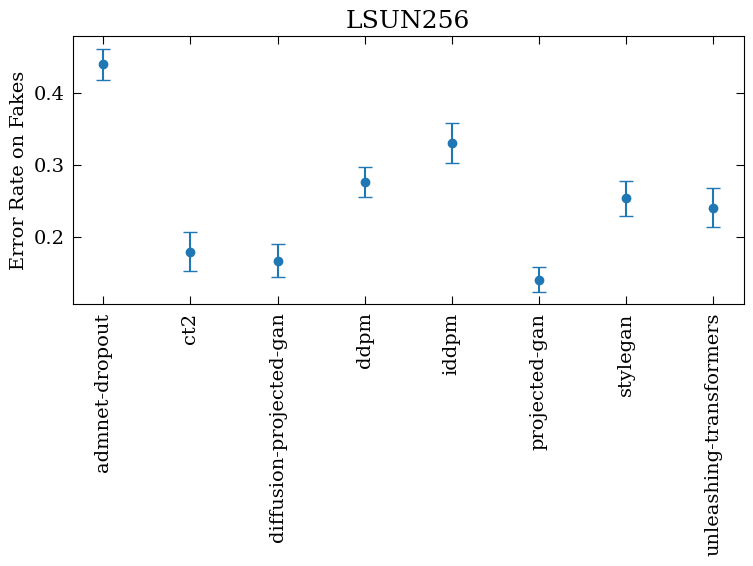

In [6]:
plt.errorbar(df_results.index, df_results.f_err_rt, yerr=df_results_sem.f_err_rt, fmt='o', capsize=5)
plt.ylabel("Error Rate on Fakes", fontsize=14)
plt.xticks(rotation=90)
plt.title(experiment_prefix)
plt.tight_layout()
plt.savefig(f'../plots/{experiment_prefix}_f_err_rt.png', bbox_inches=None, pad_inches=0.0)

plt.show()

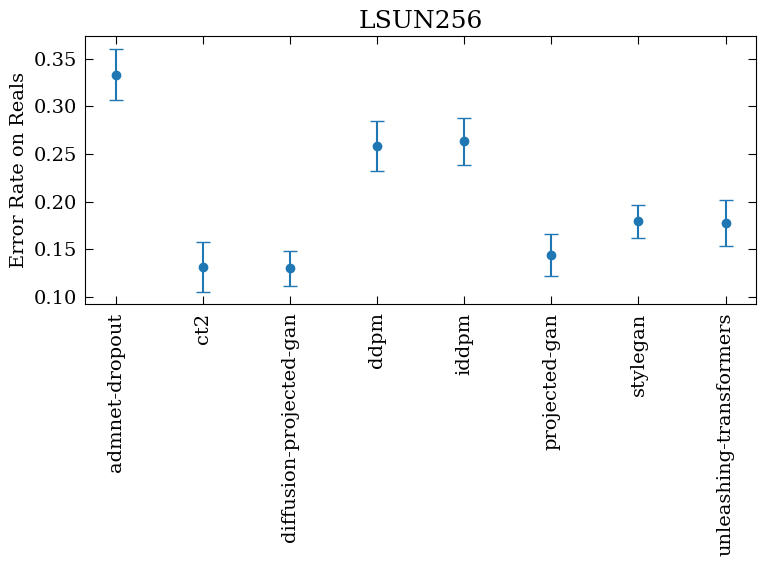

In [7]:
plt.errorbar(df_results.index, df_results.r_err_rt, yerr=df_results_sem.r_err_rt, fmt='o', capsize=5)
plt.ylabel("Error Rate on Reals", fontsize=14)
plt.xticks(rotation=90)
plt.title(experiment_prefix)
plt.tight_layout()
plt.savefig(f'../plots/{experiment_prefix}_r_err_rt.png', bbox_inches=None, pad_inches=0.0)

plt.show()